In [1]:
import tensorflow as tf
import keras
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout,SimpleRNN,LSTM,GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

In [10]:
T,D = x_train.shape[1:]

In [13]:
i=Input(shape=(T,D))
x=LSTM(128,return_sequences=True)(i)
x=GlobalMaxPooling1D()(x)
x=Dense(10,activation='softmax')(x)
model=Model(i,x)

model.compile(optimizer=tf.optimizers.Adam(lr=0.01),
        loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

r=model.fit(x_train, y_train, 
            validation_data=(x_test,y_test),
            epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2104 - accuracy: 0.9362 - val_loss: 0.0767 - val_accuracy: 0.9776
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0920 - accuracy: 0.9730 - val_loss: 0.0635 - val_accuracy: 0.9802
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0710 - accuracy: 0.9788 - val_loss: 0.0767 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0801 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0642 - accuracy: 0.9805 - val_loss: 0.0739 - val_accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0617 - accuracy: 0.9820 - val_loss: 0.0919 - val_accuracy: 0.9736
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0632 - val_accura

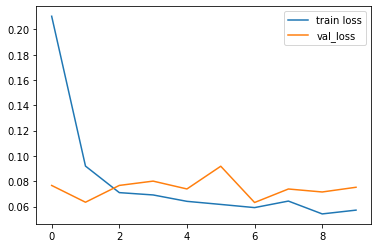

In [14]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

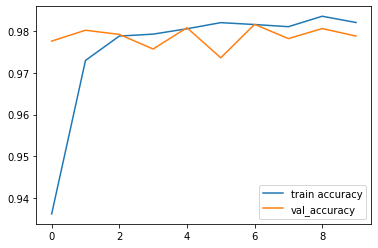

In [16]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],
label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[ 972    0    2    0    0    3    1    2    0    0]
 [   0 1119    3    3    0    1    3    2    4    0]
 [   3    2  998   14    1    2    3    3    6    0]
 [   0    0    3  987    0   17    0    1    2    0]
 [   0    2    0    0  950    0    4    6    7   13]
 [   1    0    1    2    0  883    1    1    3    0]
 [   2    2    1    0    2    9  939    0    2    1]
 [   0    5    5    7    0    1    0 1008    0    2]
 [   0    0    3    4    1    7    1    1  955    2]
 [   1    0    0    2    3    5    0    8   13  977]]


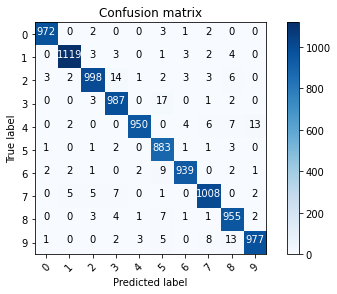

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
  else: 
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh=cm.max() /2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: 8 Predicted 5')

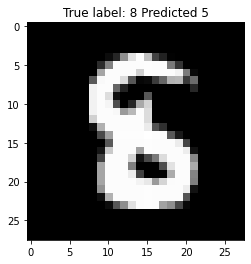

In [26]:
misclassifies_idx=np.where(p_test !=y_test)[0]
i = np.random.choice(misclassifies_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted %s" % (y_test[i],p_test[i]))